In [309]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CSV and checking it is correct

In [310]:
df = pd.read_csv('all_wines.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white wine
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white wine
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white wine
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white wine


In [311]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [312]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
 13  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [314]:
df.duplicated().sum()

np.int64(1177)

In [315]:
string_col = df.select_dtypes(include="object").columns
df[string_col].head()

,quality_label,wine_type
0,low,red wine
1,low,red wine
2,low,red wine
3,medium,red wine
4,low,red wine


In [316]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the quality_label is : 
quality_label
medium    3915
low       2384
high       198
Name: count, dtype: int64
The distribution of categorical values in the wine_type is : 
wine_type
white wine    4898
red wine      1599
Name: count, dtype: int64


# Machine Learning Starts

In [317]:
dfm = df.copy()

# Outliers

In [318]:
# for i in all_wines.columns:
#     skew = all_wines[i].astype(float).skew()
#     kurt = all_wines[i].astype(float).kurt()
#     # if i != 'quality' or i != 'quality_label' or i != 'wine_type':
#     if i != type(object):
#         print(f"{i} has a value of {skew} skewness")
#         print(f"{i} has a value of {kurt} kurtosis")
#     else:
#         continue

#Create new Data Frame with Skew and Kurtosis information


# ---------------


wine_kurtskew = pd.DataFrame({
    'skewness': dfm.select_dtypes(include='number').skew(),
    'kurtosis': dfm.select_dtypes(include='number').kurt()
})

# Set thresholds
skew_thresh = 1.5
kurt_thresh = 1.5

# Create boolean flags
wine_kurtskew['high_skew'] = wine_kurtskew['skewness'].abs() > skew_thresh
wine_kurtskew['high_kurtosis'] = wine_kurtskew['kurtosis'].abs() > kurt_thresh

print(wine_kurtskew)


                      skewness   kurtosis  high_skew  high_kurtosis
fixed_acidity         1.723290   5.061161       True           True
volatile_acidity      1.495097   2.825372      False           True
citric_acid           0.471731   2.397239      False           True
residual_sugar        1.435404   4.359272      False           True
chlorides             5.399828  50.898051       True           True
free_sulfur_dioxide   1.220066   7.906238      False           True
total_sulfur_dioxide -0.001177  -0.371664      False          False
density               0.503602   6.606067      False           True
pH                    0.386839   0.367657      False          False
sulphates             1.797270   8.653699       True           True
alcohol               0.565718  -0.531687      False          False
quality               0.189623   0.232322      False          False


In [319]:
print(wine_kurtskew[(wine_kurtskew['high_skew'] == True) & (wine_kurtskew['high_kurtosis'] == True)])

               skewness   kurtosis  high_skew  high_kurtosis
fixed_acidity  1.723290   5.061161       True           True
chlorides      5.399828  50.898051       True           True
sulphates      1.797270   8.653699       True           True


# fixed acidity

In [320]:
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1fa = np.percentile(dfm.fixed_acidity, 25)
q3fa = np.percentile(dfm.fixed_acidity, 75)
print(q1fa)
print(q3fa)


6.4
7.7


In [321]:
iqrfa = q3fa - q1fa
print(iqrfa)

1.2999999999999998


In [322]:
lower_treshold_fa = q1fa - (1.5*iqrfa)
print(lower_treshold_fa)

4.450000000000001


In [323]:
higher_treshold_fa = q3fa + (1.5*iqrfa)
print(higher_treshold_fa)

9.65


# Chlorides

In [324]:
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1cl = np.percentile(dfm.chlorides, 25)
q3cl = np.percentile(dfm.chlorides, 75)
print(q1cl)
print(q3cl)


0.038
0.065


In [325]:
iqrcl = q3cl - q1cl
print(iqrcl)

0.027000000000000003


In [326]:
lower_treshold_cl = q1cl - (1.5*iqrcl)
print(lower_treshold_cl)

-0.002500000000000009


In [327]:
higher_treshold_cl = q3cl + (1.5*iqrcl)
print(higher_treshold_cl)

0.10550000000000001


# Sulphates

In [328]:
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1su = np.percentile(dfm.sulphates, 25)
q3su = np.percentile(dfm.sulphates, 75)
print(q1su)
print(q3su)


0.43
0.6


In [329]:
iqrsu = q3su - q1su
print(iqrsu)

0.16999999999999998


In [330]:
lower_treshold_su = q1su - (1.5*iqrsu)
print(lower_treshold_su)

0.175


In [331]:
higher_treshold_su = q3su + (1.5*iqrsu)
print(higher_treshold_su)

0.855


# no Outliers

In [332]:
# dfm_clean = dfm[
#     (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa) &
#     (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl) &
#     (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
# ]
# dfm_clean.head()

dfm_clean = dfm[
    (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa)
]
dfm_clean = dfm[
    (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl)
]
dfm_clean = dfm[
    (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
]

dfm_clean.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red wine
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,red wine
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low,red wine
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium,red wine
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium,red wine
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low,red wine


# Check no Outliers

In [333]:
wine_kurtskew = pd.DataFrame({
    'skewness': dfm_clean.select_dtypes(include='number').skew(),
    'kurtosis': dfm_clean.select_dtypes(include='number').kurt()
})

# Set thresholds — adjust as needed
skew_thresh = 1.5
kurt_thresh = 1.5

# Create boolean flags
wine_kurtskew['high_skew'] = wine_kurtskew['skewness'].abs() > skew_thresh
wine_kurtskew['high_kurtosis'] = wine_kurtskew['kurtosis'].abs() > kurt_thresh

print(wine_kurtskew)

                      skewness   kurtosis  high_skew  high_kurtosis
fixed_acidity         1.787916   5.712340       True           True
volatile_acidity      1.538602   3.032899       True           True
citric_acid           0.484857   2.561524      False           True
residual_sugar        1.400716   4.246636      False           True
chlorides             3.118089  17.736881       True           True
free_sulfur_dioxide   1.219415   8.190921      False           True
total_sulfur_dioxide -0.019303  -0.322925      False          False
density               0.543092   6.939167      False           True
pH                    0.395339   0.389971      False          False
sulphates             0.503422  -0.188147      False          False
alcohol               0.558057  -0.548444      False          False
quality               0.196669   0.248069      False          False


# Encoding

In [334]:
dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
dfm_clean['wine_type'].replace({'white wine':0, 'red wine':1}, inplace=True)

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87671/2052662868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87671/2052662868.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [335]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop('wine_type', axis=1)
y = dfm_clean['wine_type']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [336]:
y_test.shape

(1262,)

In [337]:
x_test.shape

(1262, 13)

# Building Model

In [338]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=100)

In [339]:
# fit model
LR_model.fit(x_train, y_train)

/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [340]:
# predictions
preds = LR_model.predict(x_test)

In [341]:
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc = accuracy_score(y_test, preds)
print(acc)

0.971473851030111


# Evaluation Metrics


In [342]:
from sklearn.metrics import classification_report

In [343]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       955
           1       0.95      0.93      0.94       307

    accuracy                           0.97      1262
   macro avg       0.96      0.96      0.96      1262
weighted avg       0.97      0.97      0.97      1262



In [344]:
from sklearn.metrics import confusion_matrix

In [345]:
confusion_matrix(y_test, preds)

array([[940,  15],
       [ 21, 286]])

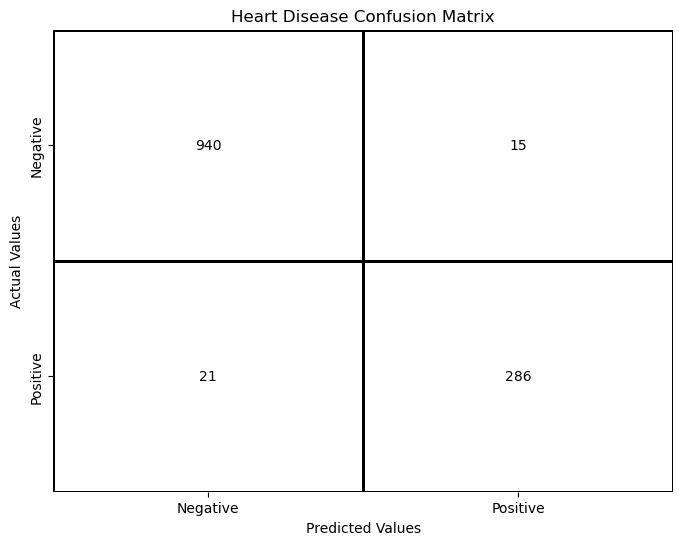

In [346]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = ["Negative","Positive"],
                     columns = ["Negative","Positive"])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Heart Disease Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()